In [5]:
# Standars libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import pickle
import itertools as it
from collections import Counter
import pyspark
from pyspark import *
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F


# Utilities functions
import sys
sys.path.append('/home/fanfou/Panorama/notebooks/utils')

print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

from visualization import *
from tools import *

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 199)


Python version
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Version info.
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [6]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
all_tweets = spark.read.json("/mnt/datastore/data/medias/top_50_world/*.json");
all_tweets.count()

234278

In [7]:
test = all_tweets.toPandas()
test.head()

,author_handle,geo_city,geo_country,geo_location,geo_state,lang,likes,main,permalink,published,replied,shared_type,shares,source_followers,source_following
0,Independent,London,GB,"London, England",England,en,3.0,Daniel Craig denies that No Time to Die is ‘cursed’,https://twitter.com/Independent/status/1237308175805751297,2020-03-10T09:23:51Z,False,NONE,3.0,2636144.0,1167.0
1,Independent,London,GB,"London, England",England,en,4.0,"Almost half of students have experienced ‘a serious psychological issue’, study finds",https://twitter.com/Independent/status/1237352717439447040,2020-03-10T12:20:51Z,False,NONE,0.0,2636144.0,1167.0
2,Independent,London,GB,"London, England",England,en,18.0,Italy suspends mortgage payments amid coronavirus lockdown,https://www.twitter.com/Independent/status/1237315471931781121,2020-03-10T09:52:51Z,False,NONE,14.0,2636144.0,1167.0
3,Independent,London,GB,"London, England",England,en,0.0,Boris Johnson makes plea for ‘great national effort’ | Your daily politics briefing,https://www.twitter.com/Independent/status/1237289244764319744,2020-03-10T08:08:38Z,False,NONE,0.0,2636144.0,1167.0
4,Independent,London,GB,"London, England",England,en,2.0,"Man in court after ‘breathing heavily down phone to care homes more than 1,000 times’",https://twitter.com/Independent/status/1237326284654628867,2020-03-10T10:35:49Z,False,NONE,2.0,2636144.0,1167.0


In [8]:
test.groupby('author_handle').count()

,geo_city,geo_country,geo_location,geo_state,lang,likes,main,permalink,published,replied,shared_type,shares,source_followers,source_following
author_handle,,,,,,,,,,,,,,
BILD,6596,6596,6596,6596,6596,6596,6596,6596,6596,6596,6596,6596,6596,6596
Corriere,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365
DailyMirror,13379,13379,13379,13379,13379,13368,13379,13379,13379,13379,13379,13368,13379,13379
Daily_Express,13745,13745,13745,13745,13745,13743,13745,13745,13745,13745,13745,13743,13745,13745
ElBaladOfficial,0,26,26,0,26,26,26,26,26,26,26,26,26,26
FinancialTimes,2547,2547,2566,2547,2566,2565,2566,2566,2566,2566,2566,2565,2566,2566
HoustonChron,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732,3732
Hurriyet,1423,1423,1423,1423,1423,1412,1423,1423,1423,1423,1423,1412,1423,1423
Independent,14719,14719,14719,14719,14719,14715,14719,14719,14719,14719,14719,14715,14719,14719


In [18]:
searchfor = ['coronavirus', 'covid', 'virus']

test['Coronavirus'] = False
test.loc[test.main.str.lower().str.contains('|'.join(searchfor)),'Coronavirus'] = True
test.head()

,author_handle,geo_city,geo_country,geo_location,geo_state,lang,likes,main,permalink,published,replied,shared_type,shares,source_followers,source_following,Coronavirus
0,Independent,London,GB,"London, England",England,en,3.0,Daniel Craig denies that No Time to Die is ‘cursed’,https://twitter.com/Independent/status/1237308175805751297,2020-03-10T09:23:51Z,False,NONE,3.0,2636144.0,1167.0,False
1,Independent,London,GB,"London, England",England,en,4.0,"Almost half of students have experienced ‘a serious psychological issue’, study finds",https://twitter.com/Independent/status/1237352717439447040,2020-03-10T12:20:51Z,False,NONE,0.0,2636144.0,1167.0,False
2,Independent,London,GB,"London, England",England,en,18.0,Italy suspends mortgage payments amid coronavirus lockdown,https://www.twitter.com/Independent/status/1237315471931781121,2020-03-10T09:52:51Z,False,NONE,14.0,2636144.0,1167.0,True
3,Independent,London,GB,"London, England",England,en,0.0,Boris Johnson makes plea for ‘great national effort’ | Your daily politics briefing,https://www.twitter.com/Independent/status/1237289244764319744,2020-03-10T08:08:38Z,False,NONE,0.0,2636144.0,1167.0,False
4,Independent,London,GB,"London, England",England,en,2.0,"Man in court after ‘breathing heavily down phone to care homes more than 1,000 times’",https://twitter.com/Independent/status/1237326284654628867,2020-03-10T10:35:49Z,False,NONE,2.0,2636144.0,1167.0,False


In [23]:
corona = test[test['Coronavirus'] == True]
corona['published'] = pd.to_datetime(corona['published'])
tweets_per_day = corona.groupby([corona.published.dt.year, corona.published.dt.month, corona.published.dt.day]).count()
tweets_per_day.index.names = ['Year', 'Month','Day']
tweets_per_day = tweets_per_day.reset_index()
tweets_per_day['date'] = pd.to_datetime(tweets_per_day[['Year', 'Month', 'Day']])
tweets_per_day = tweets_per_day[['date', 'main']]


/home/fanfou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


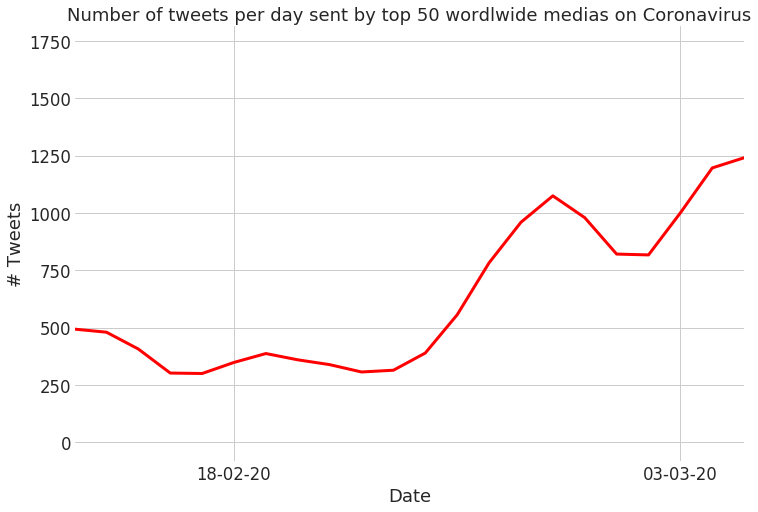

In [36]:
import datetime
# Prettier plotting with seaborn
sns.set(font_scale=1.5, style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Compute rolling mean of the count if needed
y = tweets_per_day['main'].rolling(window=3).mean()
ax.plot(tweets_per_day['date'],
  y,
  '-o',
  color='red', marker='', linewidth=3)
ax.set(xlabel='Date', ylabel='# Tweets',title='Number of tweets per day sent by top 50 wordlwide medias on Coronavirus')

# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y'))

# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.xlim([datetime.date(2020, 2, 13), datetime.date(2020, 3, 5)])

#ax.grid(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.legend()
plt.show()

,date,interest
360,2019-12-12,0
361,2019-12-13,0
362,2019-12-14,0
363,2019-12-15,0
364,2019-12-16,0


,date,medias
0,2020-01-09 00:00:00+00:00,3
1,2020-01-10 00:00:00+00:00,0
2,2020-01-11 00:00:00+00:00,0
3,2020-01-12 00:00:00+00:00,0
4,2020-01-13 00:00:00+00:00,0
